# Implementation of MNIST neural network

Authors:
Carlos Garcia Mercado
Alan Paul Garcia Rosales

In [3]:
%matplotlib inline
# !pip install matplotlib  # Uncomment and run if matplotlib is not installed yet.
import matplotlib          # We use this package to visualize some data and results
import matplotlib.pyplot as plt
import numpy as np
import mnist
from simple_network import SimpleNetwork

np.random.seed(42)

In [4]:
X_train, y_train = mnist.train_images(), mnist.train_labels()
X_test,  y_test  = mnist.test_images(), mnist.test_labels()
num_classes = 10    # classes are the digits from 0 to 9

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

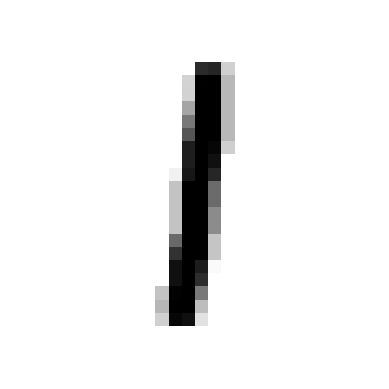

In [7]:
img_idx = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[img_idx], cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [8]:
y_test[img_idx]

1

In [9]:
X_train, X_test = X_train.reshape(-1, 28 * 28), X_test.reshape(-1, 28 * 28)

In [10]:
print("Pixel values between {} and {}".format(X_train.min(), X_train.max()))


Pixel values between 0 and 255


In [11]:
X_train, X_test = X_train / 255., X_test / 255.
print("Normalized pixel values between {} and {}".format(X_train.min(), X_train.max()))

Normalized pixel values between 0.0 and 1.0


In [12]:
y_train = np.eye(num_classes)[y_train]

In [13]:
mnist_classifier = SimpleNetwork(num_inputs=X_train.shape[1], 
                                 num_outputs=num_classes, hidden_layers_sizes=[64, 32])

In [14]:
predictions = mnist_classifier.forward(X_train)                         # forward pass
loss_untrained = mnist_classifier.loss_function(predictions, y_train)   # loss computation

accuracy_untrained = mnist_classifier.evaluate_accuracy(X_test, y_test)  # Accuracy
print("Untrained : training loss = {:.6f} | val accuracy = {:.2f}%".format(
    loss_untrained, accuracy_untrained * 100))

Untrained : training loss = 4.436700 | val accuracy = 12.19%


In [15]:
losses, accuracies = mnist_classifier.train(X_train, y_train, X_test, y_test, 
                                            batch_size=30, num_epochs=500)

Epoch    0: training loss = 1.096978 | val accuracy = 19.10%
Epoch    1: training loss = 0.886127 | val accuracy = 32.17%
Epoch    2: training loss = 0.785361 | val accuracy = 44.06%
Epoch    3: training loss = 0.695873 | val accuracy = 50.68%
Epoch    4: training loss = 0.630815 | val accuracy = 56.25%
Epoch    5: training loss = 0.576848 | val accuracy = 61.30%
Epoch    6: training loss = 0.519389 | val accuracy = 67.69%
Epoch    7: training loss = 0.465288 | val accuracy = 71.35%
Epoch    8: training loss = 0.426172 | val accuracy = 74.30%
Epoch    9: training loss = 0.396564 | val accuracy = 76.31%
Epoch   10: training loss = 0.372741 | val accuracy = 77.75%
Epoch   11: training loss = 0.352826 | val accuracy = 78.98%
Epoch   12: training loss = 0.335768 | val accuracy = 80.12%
Epoch   13: training loss = 0.320914 | val accuracy = 81.04%
Epoch   14: training loss = 0.307823 | val accuracy = 81.87%
Epoch   15: training loss = 0.296183 | val accuracy = 82.44%
Epoch   16: training los

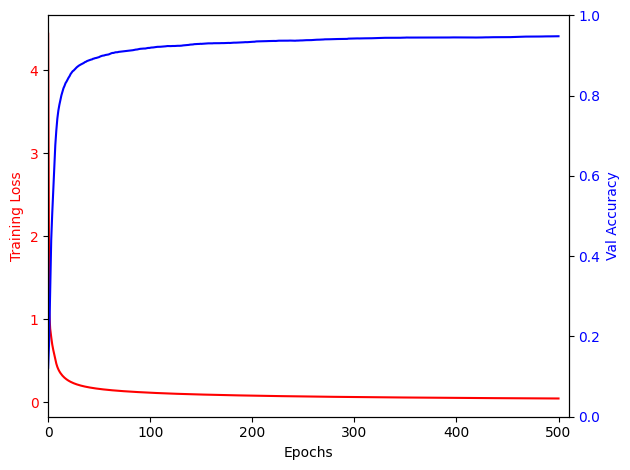

In [16]:
losses, accuracies = [loss_untrained] + losses, [accuracy_untrained] + accuracies
fig, ax_loss = plt.subplots()

color = 'red'
ax_loss.set_xlim([0, 510])
ax_loss.set_xlabel('Epochs')
ax_loss.set_ylabel('Training Loss', color=color)
ax_loss.plot(losses, color=color)
ax_loss.tick_params(axis='y', labelcolor=color)

ax_acc = ax_loss.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax_acc.set_xlim([0, 510])
ax_acc.set_ylim([0, 1])
ax_acc.set_ylabel('Val Accuracy', color=color)
ax_acc.plot(accuracies, color=color)
ax_acc.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [17]:
# We use `np.expand_dims(x, 0)` to simulate a batch (transforming the image shape
# from (784,) to (1, 784)):
predicted_class = mnist_classifier.predict(np.expand_dims(X_test[img_idx], 0))
print('Predicted class: {}; Correct class: {}'.format(predicted_class, y_test[img_idx]))

Predicted class: 1; Correct class: 1
